# Data Import

In [9]:
import pandas as pd

df = pd.read_csv("lawas/lawas-rainfall.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"],format="%Y-%m-%d %H:%M:%S")
df.set_index("DateTime",inplace=True)

In [7]:
print(df.head())

                     Rainfall (mm)  Temperature  Dew Point  Humidity  Wind  \
DateTime                                                                     
2002-08-01 00:00:00            0.0         79.0       75.0      89.0     E   
2002-08-01 01:00:00            0.0         79.0       73.0      83.0     E   
2002-08-01 02:00:00            0.0         77.0       75.0      94.0     W   
2002-08-01 03:00:00            0.0         77.0       73.0      89.0  CALM   
2002-08-01 04:00:00            0.0         79.0       73.0      83.0    NE   

                     Wind Speed  Pressure      Condition  
DateTime                                                  
2002-08-01 00:00:00         3.0     29.69  Mostly Cloudy  
2002-08-01 01:00:00         2.0     29.69  Mostly Cloudy  
2002-08-01 02:00:00         2.0     29.66  Mostly Cloudy  
2002-08-01 03:00:00         2.0     29.66  Mostly Cloudy  
2002-08-01 04:00:00         1.0     29.63  Mostly Cloudy  


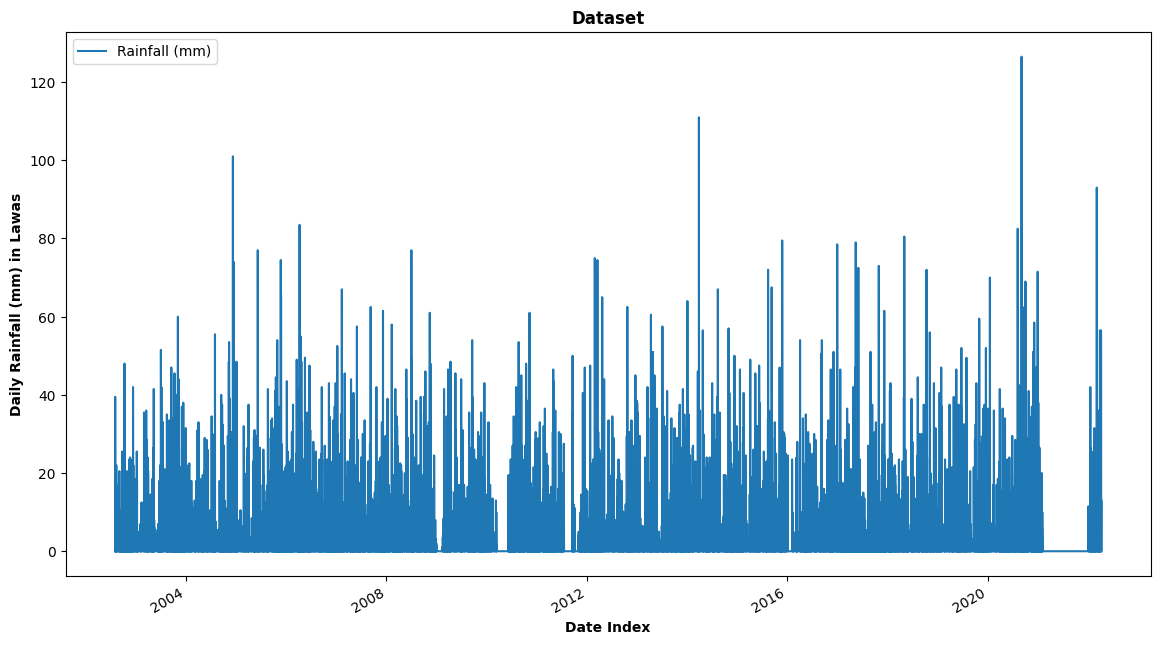

In [11]:
import matplotlib.pyplot as plt

df.reset_index().plot(x="DateTime", y="Rainfall (mm)",figsize=(14,8))
plt.ylabel('Daily Rainfall (mm) in Lawas',fontweight='bold')
plt.xlabel('Date Index',fontweight='bold')
plt.title('Dataset',fontweight='bold')
# plt.xlim(pd.Timestamp("2021-02-01"), pd.Timestamp("2022-02-01"))

plt.show()

Text(0.5, 0, 'Parameter')

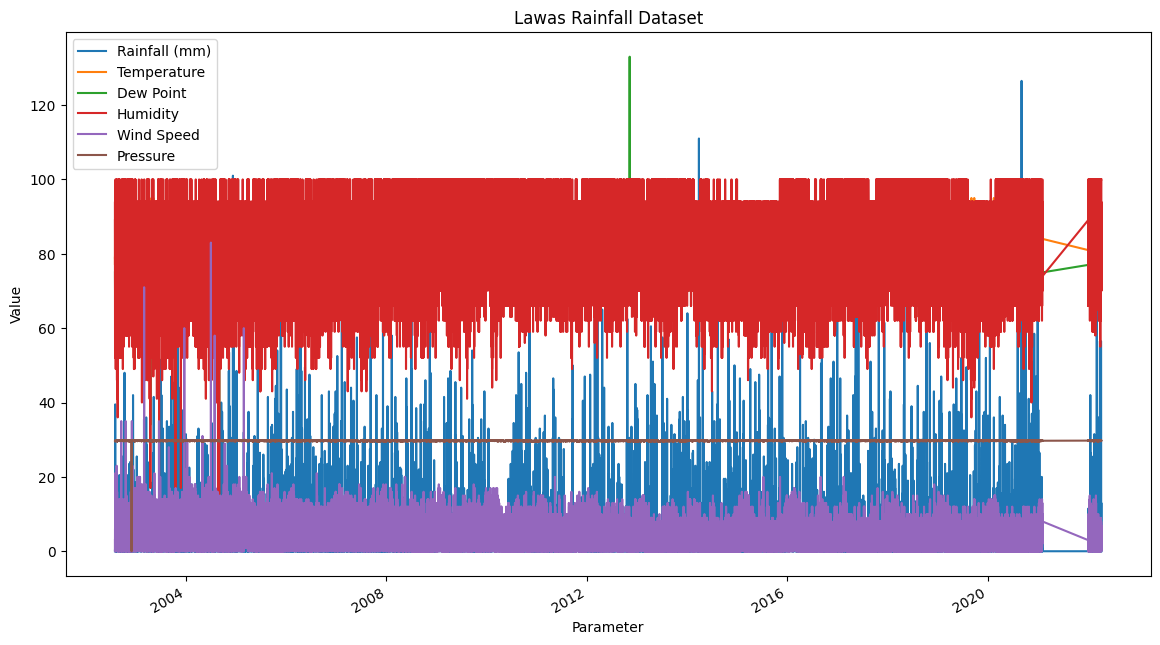

In [16]:
df.plot(kind='line',figsize=(14,8))
plt.title('Lawas Rainfall Dataset')
plt.ylabel('Value')
plt.xlabel('Parameter')

# LSTM Model Univariate

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(df["Rainfall (mm)"], n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)


d:\Metocean\lstm-rainfall\.env\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

# LSTM Model Multivariate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()